In [200]:
import pandas as pd
import os
import matplotlib.pyplot as mp

from itertools import combinations
from collections import Counter

In [11]:
#importing and creating all csv to a single file

In [3]:
files_df = [pd.read_csv(f"./Sales_Data/{file}") for file in os.listdir('./Sales_Data')]
merged_file = pd.DataFrame()

for file in files_df:
    merged_file = pd.concat([merged_file, file])

merged_file.to_csv('total_sales.csv', index=False)

In [15]:
#reading all data csv and cleaning NaN

In [110]:
df = pd.read_csv("all_data.csv")
df = df.dropna(how="all")
#parse_dates does not work coz of unclean data

In [ ]:
#cleaning data 

In [111]:
df.insert(5,'Month', df['Order Date'].str[0:2])
df = df[df['Month'] != 'Or']
df['Month'] = df['Month'].astype('int8')

headers = list(df.columns.values)
for h in headers:
    df = df[df[h] != h]

In [ ]:
#creating a Sales column and finding the highest sales month

In [112]:
df.insert(4, 'Sales', df['Quantity Ordered'].astype('int32') * df['Price Each'].astype('float'))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


In [113]:
sales_summary = df.groupby('Month').sum()
sales_summary

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


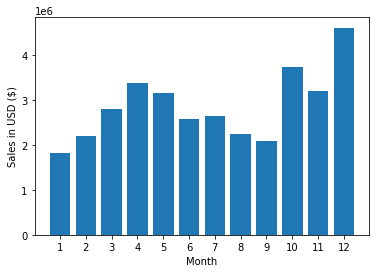

In [114]:
mp.bar(range(1,13), sales_summary['Sales'])
mp.xticks(range(1,13))
mp.xlabel('Month')
mp.ylabel('Sales in USD ($)')
mp.show()

#INFERENCE
#The Month of December has the Highest sales record in terms of months

In [ ]:
#finding city that has highest sales

In [115]:
df["City"] = df['Purchase Address'].str.split(',').str[1] + df['Purchase Address'].str.split(',').str[2].str[0:3]

In [116]:
city_sales = df.groupby('City').sum()
city_sales

,Sales,Month
City,,
Atlanta GA,2795498.58,104794.0
Austin TX,1819581.75,69829.0
Boston MA,3661642.01,141112.0
Dallas TX,2767975.40,104620.0
Los Angeles CA,5452570.80,208325.0
New York City NY,4664317.43,175741.0
Portland ME,449758.27,17144.0
Portland OR,1870732.34,70621.0
San Francisco CA,8262203.91,315520.0


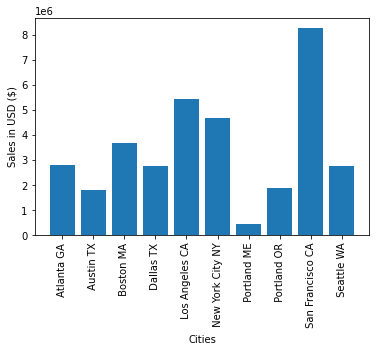

In [117]:
cities = [city for city, df in df.groupby('City')]

mp.bar(cities, city_sales['Sales'])
mp.xticks(cities, rotation='vertical')
mp.xlabel('Cities')
mp.ylabel('Sales in USD ($)')
mp.show()

#INFERENCE
#San Francisco has highest number of sales in terms of cities

In [ ]:
#Do some hypothesis testing for sales data 

In [ ]:
#what is the peak hour sale to show AD to customers

In [118]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [125]:
# df.insert(6, 'Hour', df['Order Date'].dt.hour)
# df.insert(7, 'Minute', df['Order Date'].dt.minute)
df.drop('Minute', inplace=True, axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,4,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,4,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,4,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


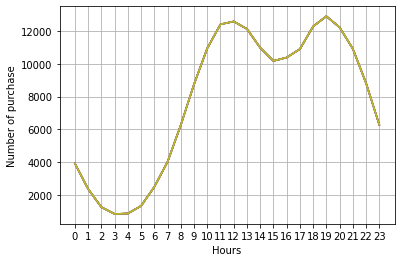

In [127]:
grp = df.groupby('Hour').count()

hours = [hour for hour, df in df.groupby('Hour')]

mp.plot(hours, grp)
mp.xticks(hours)
mp.xlabel('Hours')
mp.ylabel('Number of purchase')
mp.grid()
mp.show()


#INFERENCE
#Most purchases are done during the hours of 11AM-1PM and 5PM-7PM.
#Showing ADS just before this time would be the ideal decision.

In [ ]:
#What products are sold together most often?

In [211]:
fdf = df[df['Order ID'].duplicated(keep=False)]
fdf['Single List'] = fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/tmp/ipykernel_439541/3064380924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Single List'] = fdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [212]:
#removing the duplicates by comparing the value to the rows above
fdf = fdf[fdf['Order ID'] != fdf['Order ID'].shift(-1)]

In [215]:
counter = Counter()

for row in fdf['Single List']:
    row_items = row.split(',')
    counter.update(Counter(combinations(row_items, 2)))

print('Top 10 Most Common sold pair of items are \n')
for items, count in counter.most_common(10):
    print(f'{items[0]},{items[1]} : {count}')
    
#INFERENCE
#iphone and Lighning Charging Cables are most often purchased in pairs

Top 10 Most Common sold pair of items are 

iPhone,Lightning Charging Cable : 1005
Google Phone,USB-C Charging Cable : 987
iPhone,Wired Headphones : 447
Google Phone,Wired Headphones : 414
Vareebadd Phone,USB-C Charging Cable : 361
iPhone,Apple Airpods Headphones : 360
Google Phone,Bose SoundSport Headphones : 220
USB-C Charging Cable,Wired Headphones : 160
Vareebadd Phone,Wired Headphones : 143
Lightning Charging Cable,Wired Headphones : 92


In [ ]:
# Products that are most sold during holidays